### Importing Data

In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_pi = pd.read_csv("output/pi_walk_100.csv", dtype={"pi": object})
df_pi.head()

,Unnamed: 0,0_freq,1_freq,2_freq,3_freq,4_freq,5_freq,6_freq,7_freq,8_freq,9_freq,area_total,area_delta,pi
0,0,0,1,0,0,0,0,0,0,0,0,0.00,0.00,3.1
1,1,0,1,0,0,1,0,0,0,0,0,0.00,0.00,3.14
2,2,0,2,0,0,1,0,0,0,0,0,0.00,0.00,3.141
3,3,0,2,0,0,1,1,0,0,0,0,0.07,0.07,3.1415
4,4,0,2,0,0,1,1,0,0,0,1,0.07,0.00,3.14159


In [615]:
df_pi = df_pi.drop(df_pi.columns[0], axis=1)
df_pi["precision"] = df_pi.index + 1
df_pi.head()

,0_freq,1_freq,2_freq,3_freq,4_freq,5_freq,6_freq,7_freq,8_freq,9_freq,area_total,area_delta,pi,precision
0,0,1,0,0,0,0,0,0,0,0,0.00,0.00,3.1,1
1,0,1,0,0,1,0,0,0,0,0,0.00,0.00,3.14,2
2,0,2,0,0,1,0,0,0,0,0,0.00,0.00,3.141,3
3,0,2,0,0,1,1,0,0,0,0,0.07,0.07,3.1415,4
4,0,2,0,0,1,1,0,0,0,1,0.07,0.00,3.14159,5


#### Finding Updates
Finding the digit we get for a given precision can be helpful for analysing the distribution of digits across the data

In [616]:
digits = [1]
for i in range(df_pi.shape[0]-1):
    diff = df_pi.iloc[i+1, :10] - df_pi.iloc[i, :10]
    digit = list(diff[diff>0].index)[0].strip("_freq")
    digits.append(int(digit))
df_pi["digit"] = digits

In [617]:
df_pi.head()

,0_freq,1_freq,2_freq,3_freq,4_freq,5_freq,6_freq,7_freq,8_freq,9_freq,area_total,area_delta,pi,precision,digit
0,0,1,0,0,0,0,0,0,0,0,0.00,0.00,3.1,1,1
1,0,1,0,0,1,0,0,0,0,0,0.00,0.00,3.14,2,4
2,0,2,0,0,1,0,0,0,0,0,0.00,0.00,3.141,3,1
3,0,2,0,0,1,1,0,0,0,0,0.07,0.07,3.1415,4,5
4,0,2,0,0,1,1,0,0,0,1,0.07,0.00,3.14159,5,9


### Exploring the Distribution

Text(0.5, 0.98, 'Distribution of Digits')

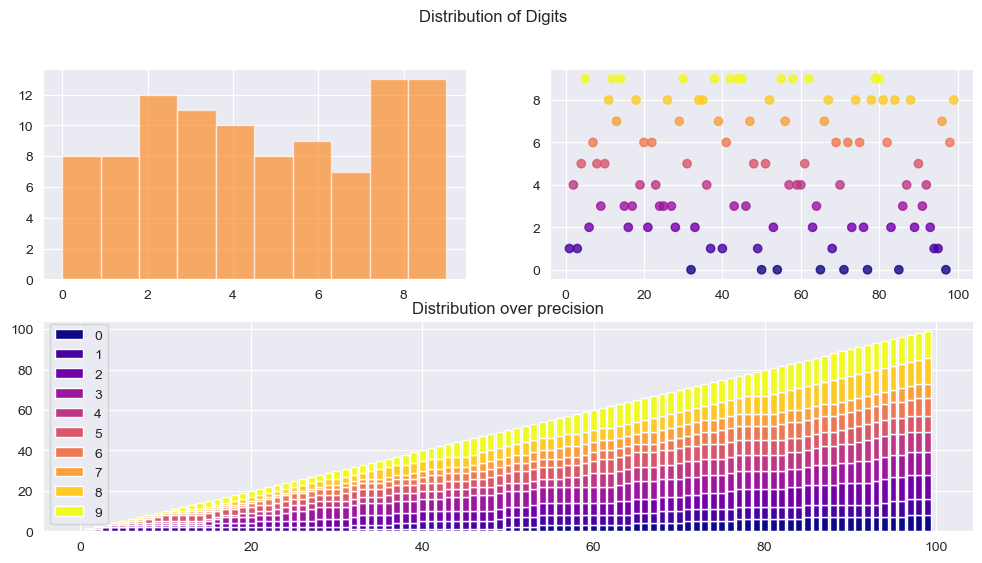

In [712]:
fig = plt.figure(figsize=(12, 6))
hist_ax = fig.add_subplot(221)
scatter_ax = fig.add_subplot(222)
bar_ax = fig.add_subplot(212)

hist_ax.hist(df_pi["digit"], alpha=0.614, color="tab:orange");
scatter_ax.scatter(df_pi["precision"], df_pi["digit"], c=df_pi["digit"], alpha=0.8, cmap="plasma");

freq_columns = list(df_pi.iloc[:, :10].columns)

color_x = np.linspace(0, 1, 10)
colors = plt.cm.plasma(color_x)

for i in range(len(freq_columns)):
    bottom_values = np.sum(df_pi[freq_columns[:i]], axis=1) if i > 0 else 0
    bar_ax.bar(df_pi["precision"], df_pi[freq_columns[i]], bottom=bottom_values, label=f"{i}", color=colors[i])

bar_ax.legend()
bar_ax.set_title("Distribution over precision")
fig.suptitle("Distribution of Digits")

Text(0.5, 1.0, 'Digits over Precison')

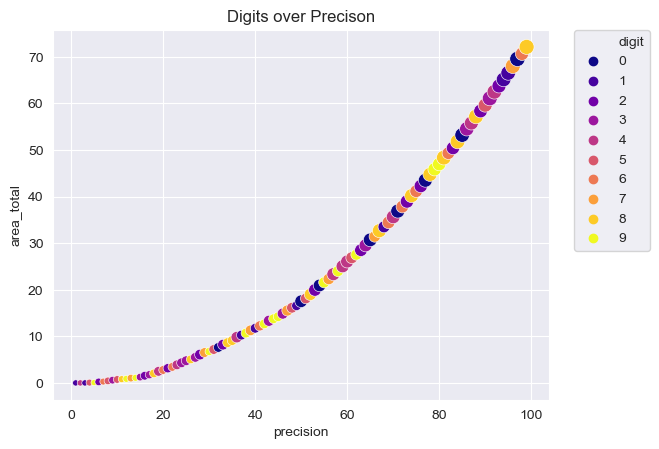

In [713]:
import seaborn as sns
sns.set_style("darkgrid")
scatter = sns.scatterplot(data=df_pi, x="precision", y="area_total", hue="digit", legend="full", palette="plasma", size="area_delta", sizes=(20, 120))

# Only get the legend for digits
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[:11], labels=labels[:11], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
scatter.set_title("Digits over Precison");

Text(0.5, 1.0, 'Digits at Time')

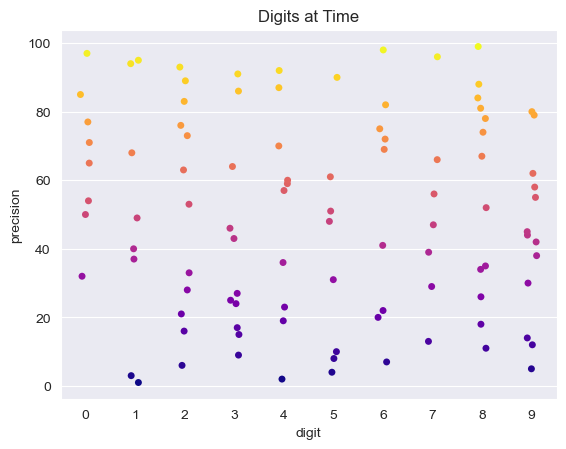

In [ ]:
sns.stripplot(data=df_pi, x="digit", y="precision", hue="precision", palette="plasma", legend=False);
plt.title("Digits at Time");

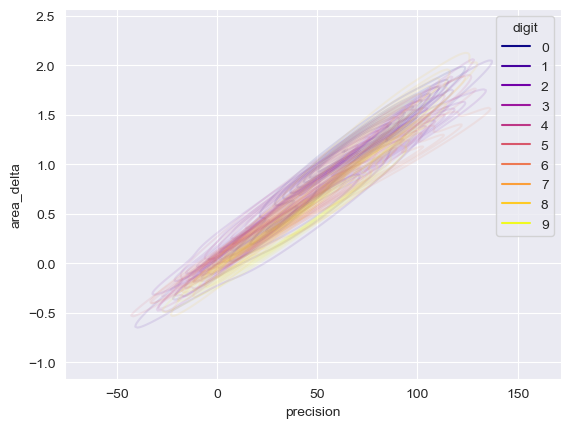

In [421]:
sns.kdeplot(data=df_pi, x="precision", y="area_delta", hue="digit", alpha=0.1, palette="plasma");

The kde plot can be beneficial for comparing the pi walk with the other irrational numbers such as e and phi.

### Area deltas

### Scaling by Precision
We see that the area_delta (the new digit's contribution to the overall area) increases over time, but in order to compare them to each other we might want to scale the area delta by the precision as we know that the significance of a digit will decrease over time.

Text(0.5, 0.98, 'Area Delta over Precision')

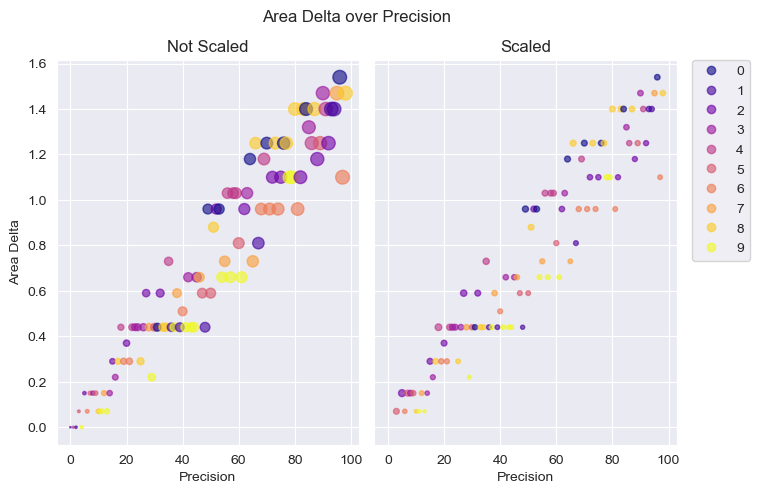

In [730]:
fig = plt.figure(figsize=(8,5))
gs = fig.add_gridspec(1, 2, hspace=0.2, wspace=0.05)
axes = gs.subplots(sharey='row')
ax1, ax2 = axes

ax1.scatter(df_pi.index, df_pi["area_delta"], s=df_pi["precision"], alpha=0.614, c=df_pi["digit"], cmap="plasma");
plot2 = ax2.scatter(df_pi.index, df_pi["area_delta"], s=df_pi["area_delta"]/df_pi["precision"]*1000, alpha=0.614, c=df_pi["digit"], cmap="plasma")

legend_labels = sorted(df_pi["digit"].unique())
legend_handles = plot2.legend_elements()[0]
ax2.legend(handles= legend_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

ax1.set_title("Not Scaled")
ax1.set_xlabel("Precision")
ax1.set_ylabel("Area Delta")

ax2.set_title("Scaled")
ax2.set_xlabel("Precision")

fig.suptitle("Area Delta over Precision")

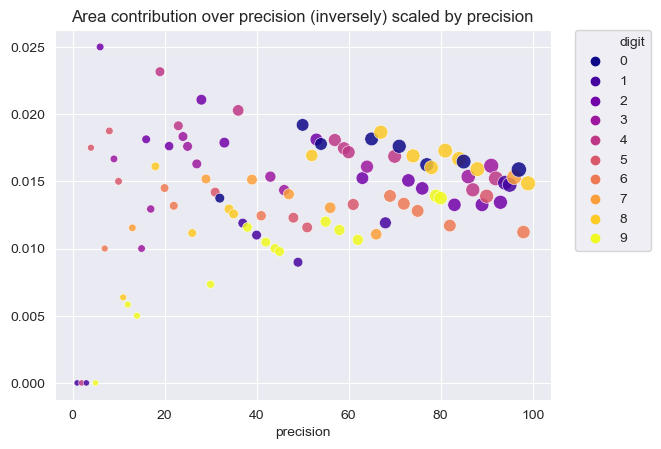

In [423]:
scatter = sns.scatterplot(data=df_pi, x="precision", y=df_pi["area_delta"]/df_pi["precision"], hue="digit", legend="full", palette="plasma", size="area_delta", sizes=(20, 120), alpha=0.85)
# Only get the legend for colors
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[:11], labels=labels[:11], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title("Area contribution over precision (inversely) scaled by precision");

### Digit Frequencies over Time (precision)

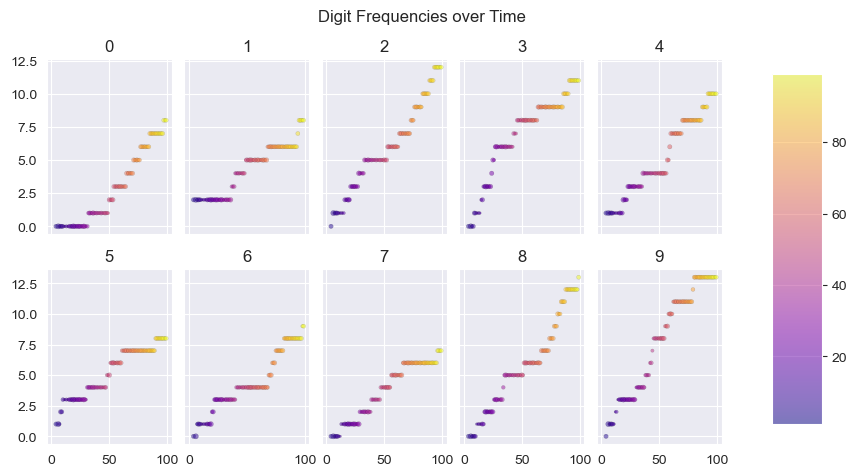

In [720]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(2, 5, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axes = axs.ravel()
for i in range(len(axes)):
    scatter = axes[i].scatter(df_pi["precision"], df_pi[str(i)+"_freq"], c=df_pi["precision"], cmap="plasma", s=df_pi["area_delta"]/df_pi["precision"]*600, alpha=0.5, edgecolors="black", linewidth=0.1)
    axes[i].set_title(str(i))

fig.suptitle("Digit Frequencies over Time");
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(scatter, cax=cbar_ax);

### Update Periods (Wait Streaks)
We can look for the time it takes for a digit frequency to get updated e.g. how much time does it take on average to get the next 0?

In [ ]:
streaks = []
counters = np.array([0 for i in range(10)])

latest = 10
for index, row in df_pi.iterrows():
    counters += 1
    counters[row["digit"]] = 0
    streaks.append(counters.copy())

streaks_df = pd.DataFrame(streaks)
streaks_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,1,1,1,1,1,1,1
1,2,1,2,2,0,2,2,2,2,2
2,3,0,3,3,1,3,3,3,3,3
3,4,1,4,4,2,0,4,4,4,4
4,5,2,5,5,3,1,5,5,5,0


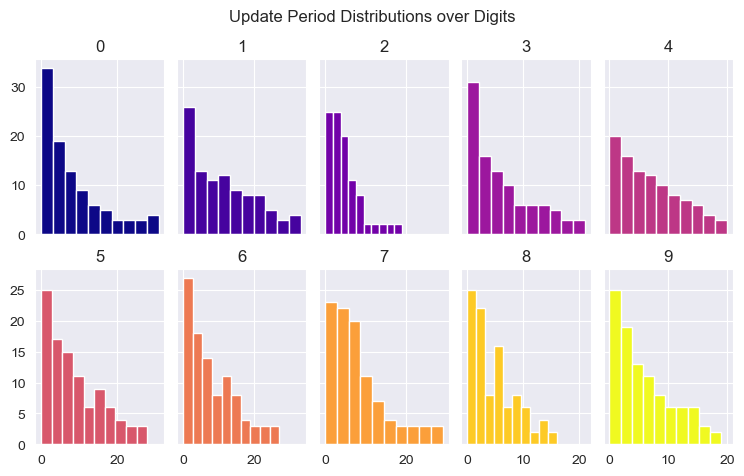

In [426]:
fig = plt.figure(figsize=(9,5))
gs = fig.add_gridspec(2, 5, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axes = axs.ravel()

color_x = np.linspace(0, 1, 10)
colors = plt.cm.plasma(color_x)

for i in range(len(axes)):
    axes[i].hist(streaks_df[i], color=colors[i])
    axes[i].set_title(i)

fig.suptitle("Update Period Distributions over Digits");

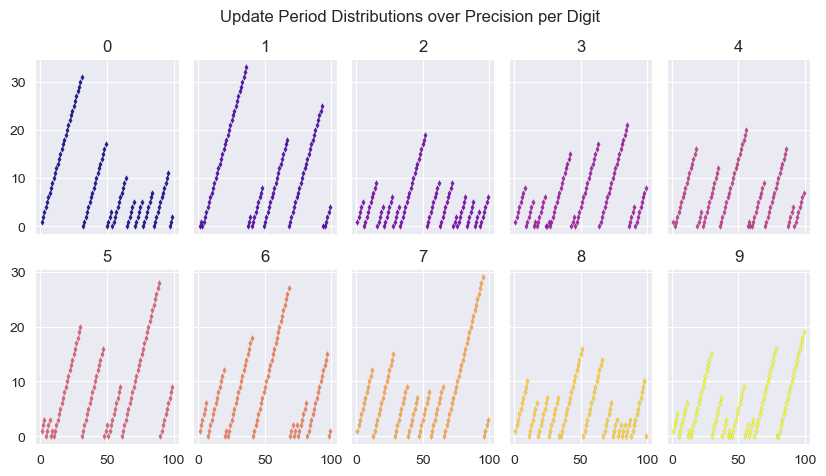

In [731]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(2, 5, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axes = axs.ravel()

color_x = np.linspace(0, 1, 10)
colors = plt.cm.plasma(color_x)

for i in range(len(axes)):
    axes[i].scatter(streaks_df.index + 1, streaks_df[i], color=colors[i], s=10, marker="d", edgecolors="black", lw=0.04, alpha=0.9)
    axes[i].set_title(i)

fig.suptitle("Update Period Distributions over Precision per Digit");

### Even, Odd, Prime Frequencies

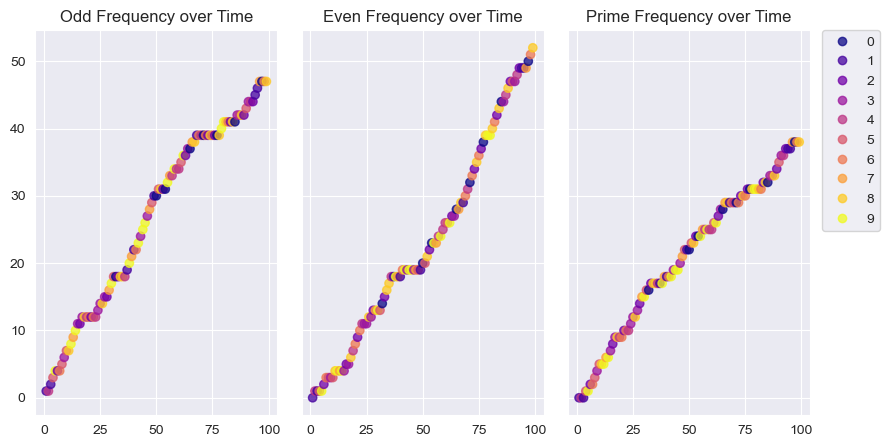

In [708]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1, 3, hspace=0.2, wspace=0.1)
axes = gs.subplots(sharey='row')

odd_frequencies = df_pi["1_freq"] + df_pi["3_freq"] + df_pi["5_freq"] + df_pi["7_freq"] + df_pi["9_freq"]
even_frequencies = df_pi["0_freq"] + df_pi["2_freq"] + df_pi["4_freq"] + df_pi["6_freq"] + df_pi["8_freq"]
prime_frequencies = df_pi["2_freq"] + df_pi["3_freq"] + df_pi["5_freq"] + df_pi["7_freq"]

axes[0].scatter(df_pi["precision"], odd_frequencies, c=df_pi["digit"], cmap="plasma", alpha=0.75)
axes[1].scatter(df_pi["precision"], even_frequencies, c=df_pi["digit"], cmap="plasma", alpha=0.75)
prime_plot = axes[2].scatter(df_pi["precision"], prime_frequencies, c=df_pi["digit"], cmap="plasma", alpha=0.75)

axes[0].set_title("Odd Frequency over Time")
axes[1].set_title("Even Frequency over Time")
axes[2].set_title("Prime Frequency over Time")

legend_labels = sorted(df_pi["digit"].unique())
legend_handles = prime_plot.legend_elements()[0]
axes[2].legend(handles= legend_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

### Approximation

#### Monte Carlo

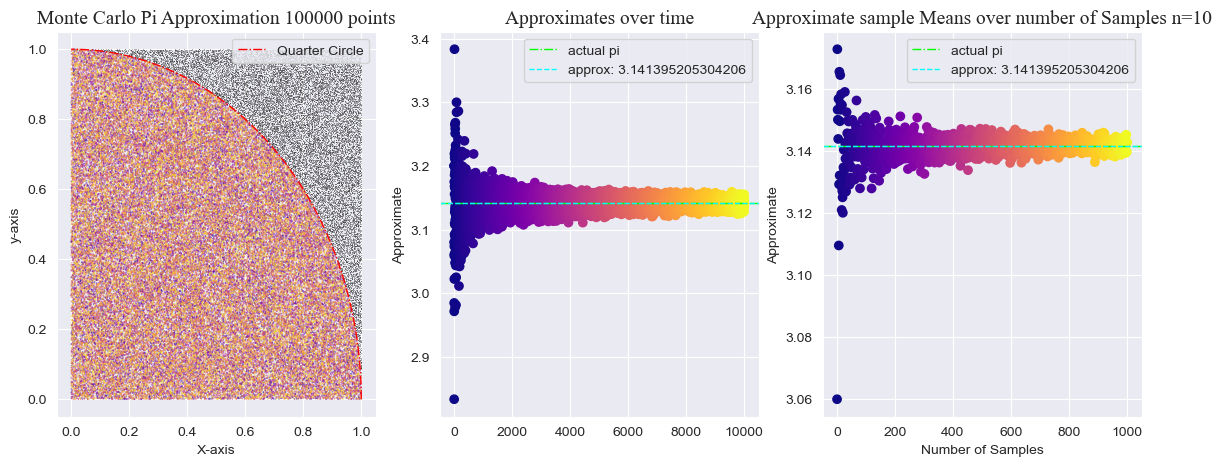

monte_carlo estimate (100000 points) 3.13392
estimate means 3.141395205304206
mean estimate sample means 3.141395205304206


In [727]:
from decimal import Decimal, getcontext

def monte_carlo_pi_approximation(num_points):
    inside_circle_points = []
    outside_circle_points = []

    points = np.random.rand(num_points, 2)

    for point in points:
        x, y = point
        distance = np.sqrt(x**2 + y**2)
        if distance <= 1:
            inside_circle_points.append(point)
        else:
            outside_circle_points.append(point)

    pi_estimate = 4 * (len(inside_circle_points) / num_points)

    return pi_estimate, inside_circle_points, outside_circle_points


estimates = []
for points_number in np.arange(100, 100100, 10):
    estimate, inside_points, outside_points = monte_carlo_pi_approximation(points_number)
    estimates.append(estimate)
estimates = np.array(estimates)

num_points = 100000
estimated_pi, inside_points, outside_points = monte_carlo_pi_approximation(num_points)


fig, axes = plt.subplots(1, 3, figsize=(14, 5))

color_x_ax0 = np.linspace(0, 1, len(inside_points))
colors_ax0 = plt.cm.plasma(color_x_ax0)
colors_x_ax1 = np.linspace(0, 1, len(estimates))
colors_ax1 = plt.cm.plasma(colors_x_ax1)

inside_points = np.array(inside_points)
outside_points = np.array(outside_points)

theta = np.linspace(0, np.pi / 2, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

getcontext().prec = 100
df_pi["pi_float"] = df_pi['pi'].apply(lambda x: float(Decimal(x)))

axes[0].scatter(inside_points[:, 0], inside_points[:, 1], color=colors_ax0, marker='d', alpha=1, s=0.01)
axes[0].scatter(outside_points[:, 0], outside_points[:, 1], color="tab:gray", marker='D', s=0.1, edgecolors="black", linewidths=0.1)
axes[0].plot(x_circle, y_circle, color='red', linestyle='-.', linewidth=1, label='Quarter Circle')

axes[1].scatter(np.linspace(1, len(estimates), len(estimates)), estimates, color=colors_ax1)
axes[1].axhline(y=df_pi["pi_float"].iloc[-1], color="lime", ls="-.", lw=1, label="actual pi")
axes[1].axhline(y=estimates.mean(), color="aqua", ls="--", lw=1, label="approx: " + str(estimates.mean()))

sample_means = np.reshape(estimates, (1000, 10)).mean(axis=1)
colors_x_ax2 = np.linspace(0, 1, len(sample_means))
colors_ax2 = plt.cm.plasma(colors_x_ax2)

axes[2].scatter(np.linspace(1, len(sample_means), len(sample_means)), sample_means, color=colors_ax2)
axes[2].axhline(y=df_pi["pi_float"].iloc[-1], color="lime", ls="-.", lw=1, label="actual pi")
axes[2].axhline(y=sample_means.mean(), color="aqua", ls="--", lw=1, label="approx: " + str(sample_means.mean()))

axes[0].set_title('Monte Carlo Pi Approximation 100000 points', fontname='Times New Roman', fontsize=14)
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel("y-axis")

axes[1].set_title("Approximates over time", fontname='Times New Roman', fontsize=14)
axes[1].set_ylabel("Approximate")

axes[2].set_title("Approximate sample Means over number of Samples n=10", fontname='Times New Roman', fontsize=14)
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel("Approximate")

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.show()

print(f"monte_carlo estimate (100000 points) {estimated_pi}")
print(f"estimate means {estimates.mean()}")
print(f"mean estimate sample means {sample_means.mean()}")